# HomeWork #1 Machine Learning
Stu. name: Seyed Mohammad Amin Dadgar <br>
Stu. no: 4003624016

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import scipy


## Q2

In [2]:
## column names are used from ```pima-indians-diabetes.name``` file
cols = ['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin', 'mass', 'pedi', 'age', 'label']

df = pd.read_csv('hw1_data/pima/pima-indians-diabetes.data', index_col=False ,names=cols)
df.head()

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
0                6           148              72                 35   
1                1            85              66                 29   
2                8           183              64                  0   
3                1            89              66                 23   
4                0           137              40                 35   

   2h_insulin  mass   pedi  age  label  
0           0  33.6  0.627   50      1  
1           0  26.6  0.351   31      0  
2           0  23.3  0.672   32      1  
3          94  28.1  0.167   21      0  
4         168  43.1  2.288   33      1

In [3]:
## save the dataset in the right format with its columns for other usages 
df.to_csv('hw1_data/processed/pima-indians-diabetes.csv')

### (a, b)

In [4]:
df.describe()

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
count       768.000000    768.000000      768.000000         768.000000   
mean          3.845052    120.894531       69.105469          20.536458   
std           3.369578     31.972618       19.355807          15.952218   
min           0.000000      0.000000        0.000000           0.000000   
25%           1.000000     99.000000       62.000000           0.000000   
50%           3.000000    117.000000       72.000000          23.000000   
75%           6.000000    140.250000       80.000000          32.000000   
max          17.000000    199.000000      122.000000          99.000000   

       2h_insulin        mass        pedi         age       label  
count  768.000000  768.000000  768.000000  768.000000  768.000000  
mean    79.799479   31.992578    0.471876   33.240885    0.348958  
std    115.244002    7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.000000    0.078000   21.000000    0.000000  
25%      0.000000   27.300000    0.243750   24.000000    0.000000  
50%     30.500000   32.000000    0.372500   29.000000    0.000000  
75%    127.250000   36.600000    0.626250   41.000000    1.000000  
max    846.000000   67.100000    2.420000   81.000000    1.000000

In [5]:
## the variance of each attribute
pd.DataFrame(df.var(), columns=['variance'])

variance
pregnancy_count       11.354056
glucose_test        1022.248314
blood_pressure       374.647271
triceps_thickness    254.473245
2h_insulin         13281.180078
mass                  62.159984
pedi                   0.109779
age                  138.303046
label                  0.227483

### (c)

In [6]:
## Calculating the correlation between 8 attributes (label is outcluded)
attr_corr = df[cols[:-1]].corr()
attr_corr

pregnancy_count  glucose_test  blood_pressure  \
pregnancy_count           1.000000      0.129459        0.141282   
glucose_test              0.129459      1.000000        0.152590   
blood_pressure            0.141282      0.152590        1.000000   
triceps_thickness        -0.081672      0.057328        0.207371   
2h_insulin               -0.073535      0.331357        0.088933   
mass                      0.017683      0.221071        0.281805   
pedi                     -0.033523      0.137337        0.041265   
age                       0.544341      0.263514        0.239528   

                   triceps_thickness  2h_insulin      mass      pedi       age  
pregnancy_count            -0.081672   -0.073535  0.017683 -0.033523  0.544341  
glucose_test                0.057328    0.331357  0.221071  0.137337  0.263514  
blood_pressure              0.207371    0.088933  0.281805  0.041265  0.239528  
triceps_thickness           1.000000    0.436783  0.392573  0.183928 -0.113970  
2h_insulin                  0.436783    1.000000  0.197859  0.185071 -0.042163  
mass                        0.392573    0.197859  1.000000  0.140647  0.036242  
pedi                        0.183928    0.185071  0.140647  1.000000  0.033561  
age                        -0.113970   -0.042163  0.036242  0.033561  1.000000

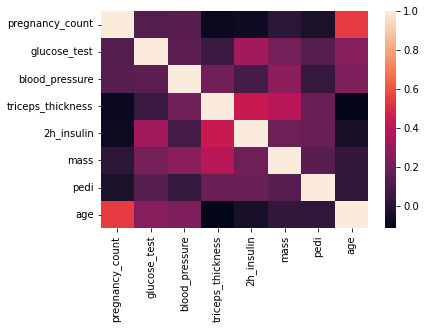

In [7]:
## showing the heatmap for better visualization
sns.heatmap(attr_corr)
plt.show()

In [8]:
label_corr = df.corrwith(df.label).sort_values(ascending=False)
pd.DataFrame(label_corr, columns=['correlation'])

correlation
label                 1.000000
glucose_test          0.466581
mass                  0.292695
age                   0.238356
pregnancy_count       0.221898
pedi                  0.173844
2h_insulin            0.130548
triceps_thickness     0.074752
blood_pressure        0.065068

What we will find out from the correlation matrix with label is the most useful feature (Or the most affective feature ) for the label is *glucose_test*. To find why it is the most helpful attribute we can review the correlation formula with below
\begin{equation}
correlation = \frac{covariance(x,y)}{var(x) var(y)}
\end{equation}
And with this equation it's obvious that if coefficient is positive then the effect of can be if x increases then y is increased. By this reason the biggest value for correlation of a feature with lable can be intrepreted the most helpful feature (attribute).

Also to explain the correlation value of one we can say that, x variable is the same as y in eq(1).

### (d)
If 2 attributes are fully correlated then using both in prediction may make bias and the prediction result would not be helpful. The alternative and the better way for prediction is to use one of the attributes. 

### (f)

/home/amin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

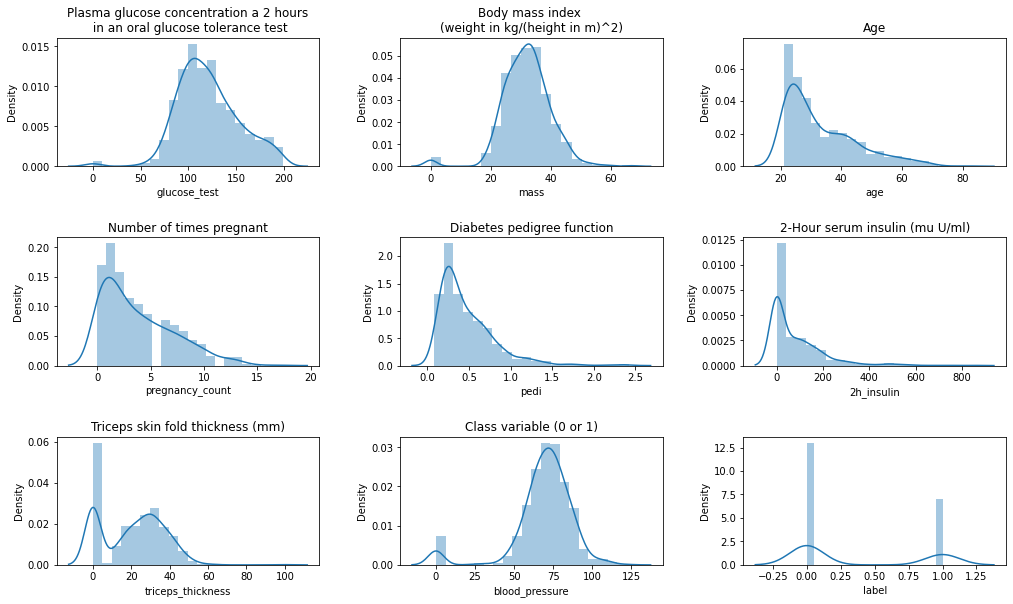

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(15,9))
fig.tight_layout(pad=5)


sns.distplot(df.glucose_test, bins=20, ax=ax[0,0])
ax[0,0].set_title('Plasma glucose concentration a 2 hours\n in an oral glucose tolerance test')

sns.distplot(df.mass, bins=20, ax=ax[0,1])
ax[0, 1].set_title('Body mass index \n(weight in kg/(height in m)^2)')

sns.distplot(df.age, bins=20, ax=ax[0,2])
ax[0, 2].set_title('Age')

sns.distplot(df.pregnancy_count, bins=20, ax=ax[1,0])
ax[1, 0].set_title('Number of times pregnant')

sns.distplot(df.pedi, bins=20, ax=ax[1, 1])
ax[1, 1].set_title('Diabetes pedigree function')

sns.distplot(df['2h_insulin'], bins=20, ax=ax[1, 2])
ax[1, 2].set_title('2-Hour serum insulin (mu U/ml)')

sns.distplot(df.triceps_thickness, bins=20, ax=ax[2, 0])
ax[2, 0].set_title('Triceps skin fold thickness (mm)')

sns.distplot(df.blood_pressure, bins=20, ax=ax[2, 1])
ax[2, 1].set_title('Diastolic blood pressure (mm Hg)')

sns.distplot(df.label, bins=20, ax=ax[2, 2])
ax[2, 1].set_title('Class variable (0 or 1)')

plt.show()


If we look closely we can say that body mass index and the plasma glucose is the most similar to normal distribution. 

/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/amin/.l

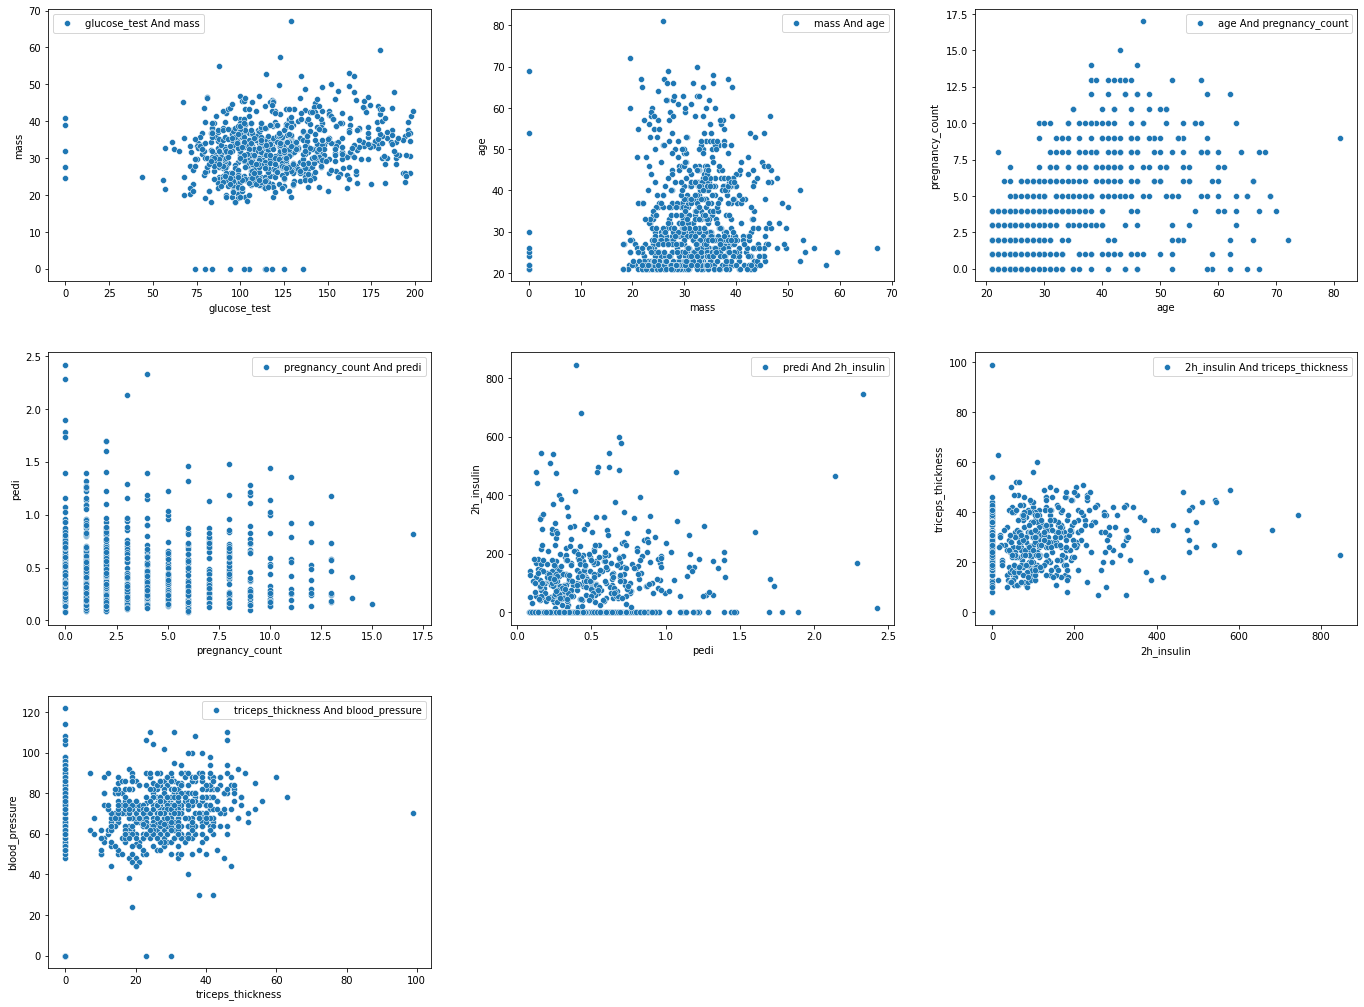

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
fig.tight_layout(pad=5)



sns.scatterplot(df.glucose_test,df.mass, ax=ax[0,0])
ax[0,0].legend(['glucose_test And mass'])

sns.scatterplot(df.mass, df.age, ax=ax[0,1])
ax[0, 1].legend(['mass And age'])


sns.scatterplot(df.age, df.pregnancy_count, ax=ax[0,2])
ax[0, 2].legend(['age And pregnancy_count'])

sns.scatterplot(df.pregnancy_count, df.pedi, ax=ax[1,0])
ax[1, 0].legend(['pregnancy_count And predi'])

sns.scatterplot(df.pedi, df['2h_insulin'], ax=ax[1, 1])
ax[1, 1].legend(['predi And 2h_insulin'])

sns.scatterplot(df['2h_insulin'], df.triceps_thickness, ax=ax[1, 2])
ax[1, 2].legend(['2h_insulin And triceps_thickness'])

sns.scatterplot(df.triceps_thickness, df.blood_pressure, ax=ax[2, 0])
ax[2, 0].legend(['triceps_thickness And blood_pressure'])

ax[2,1].set_axis_off()
ax[2,2].set_axis_off()

plt.show()


It is obvious that for (pregnancy_count, predi) and (age, pregnancy_count) we can say they have linear dependency.

## Q3

### (a)
create a normalize function using the equation below
\begin{equation}
x_{norm} = \frac{x- \mu_x}{\sigma_x}
\end{equation}
normalize the third attribute on pima dataset, then report the values for the first 5 entries on dataset.

In [11]:
## column names are used from ```pima-indians-diabetes.name``` file
cols = ['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin', 'mass', 'pedi', 'age', 'label']

df = pd.read_csv('hw1_data/pima/pima-indians-diabetes.data', index_col=False ,names=cols)
df.head()

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
0                6           148              72                 35   
1                1            85              66                 29   
2                8           183              64                  0   
3                1            89              66                 23   
4                0           137              40                 35   

   2h_insulin  mass   pedi  age  label  
0           0  33.6  0.627   50      1  
1           0  26.6  0.351   31      0  
2           0  23.3  0.672   32      1  
3          94  28.1  0.167   21      0  
4         168  43.1  2.288   33      1

In [12]:
def normalize(attrib):
    """
    normalize an attribute using its mean and standard deviation

    INPUTS:
    --------
    attrib: a pandas series, the original unormalized attribute

    OUTPUT:
    --------
    normalized:  the normalized attribute
    """

    mu = attrib.mean()
    sigma = attrib.std()

    normalized = (attrib - mu) / sigma
    return normalized

## third attribute is blood pressure
blood_pressure_norm = normalize(df.blood_pressure)
pd.DataFrame(blood_pressure_norm)

blood_pressure
0          0.149543
1         -0.160441
2         -0.263769
3         -0.160441
4         -1.503707
..              ...
763        0.356200
764        0.046215
765        0.149543
766       -0.470426
767        0.046215

[768 rows x 1 columns]

In [13]:
## normalize first 5 attribute of the function
normalize(df[['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin']])

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
0           0.639530      0.847771        0.149543           0.906679   
1          -0.844335     -1.122665       -0.160441           0.530556   
2           1.233077      1.942458       -0.263769          -1.287373   
3          -0.844335     -0.997558       -0.160441           0.154433   
4          -1.141108      0.503727       -1.503707           0.906679   
..               ...           ...             ...                ...   
763         1.826623     -0.622237        0.356200           1.721613   
764        -0.547562      0.034575        0.046215           0.405181   
765         0.342757      0.003299        0.149543           0.154433   
766        -0.844335      0.159683       -0.470426          -1.287373   
767        -0.844335     -0.872451        0.046215           0.655930   

     2h_insulin  
0     -0.692439  
1     -0.692439  
2     -0.692439  
3      0.123221  
4      0.765337  
..          ...  
763    0.869464  
764   -0.692439  
765    0.279412  
766   -0.692439  
767   -0.692439  

[768 rows x 5 columns]

In [14]:
new_df = df[['pregnancy_count', 'glucose_test', 'triceps_thickness', '2h_insulin']].copy()
new_df['normalized_blood_pressure'] = blood_pressure_norm
new_df.head()

pregnancy_count  glucose_test  triceps_thickness  2h_insulin  \
0                6           148                 35           0   
1                1            85                 29           0   
2                8           183                  0           0   
3                1            89                 23          94   
4                0           137                 35         168   

   normalized_blood_pressure  
0                   0.149543  
1                  -0.160441  
2                  -0.263769  
3                  -0.160441  
4                  -1.503707

### (b)

In [15]:
def discretize_attribute(attribute ,bins=10, verbose=False):
    """
    descritize a continues attribute and make the intervals the bins size

    INPUTS:
    --------
    attribute: pandas series of **one column**
    bins:  the interval space for each class, default is 10
    verbose: print the each stage output if True, default is False

    OUTPUT:
    --------
    pandas dataframe of the discrite values of an attribute 
    """
    list = np.empty((1,len(attribute.columns)))

    ## each bin length 
    bin_len = attribute.max().max() / bins
    # bin_len = int(bin_len)

    if verbose: print(f'bin length: {bin_len}')
    
    ## counter to iterate the intervals
    interval = 0
    while interval < attribute.max().max():
        ## find the attributes within the interval and drop na (NAN values are thoes who are not in the interval)
        conditioned_data = attribute.where((interval < attribute) & (attribute < interval + bin_len)).dropna().values
        
        if verbose: print(conditioned_data)
        
        ## To discretize the attributes set all the values to the mean of interval we have
        conditioned_data[True] = (interval + bin_len) / 2

        list = np.append(list, conditioned_data, axis=0 )
        ## iterate the next intervals
        interval += bin_len


    return pd.DataFrame(list, columns=attribute.columns, dtype='float32')
    

attrib = df[['blood_pressure']]
df_discrete_blood_pressure =  discretize_attribute(attrib, 10)
df_discrete_blood_pressure


blood_pressure
0          0.000000
1         12.200000
2         18.299999
3         18.299999
4         24.400000
..              ...
728       61.000000
729       61.000000
730       61.000000
731       61.000000
732       61.000000

[733 rows x 1 columns]

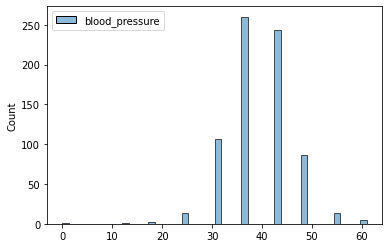

In [16]:
sns.histplot(df_discrete_blood_pressure)
plt.show()

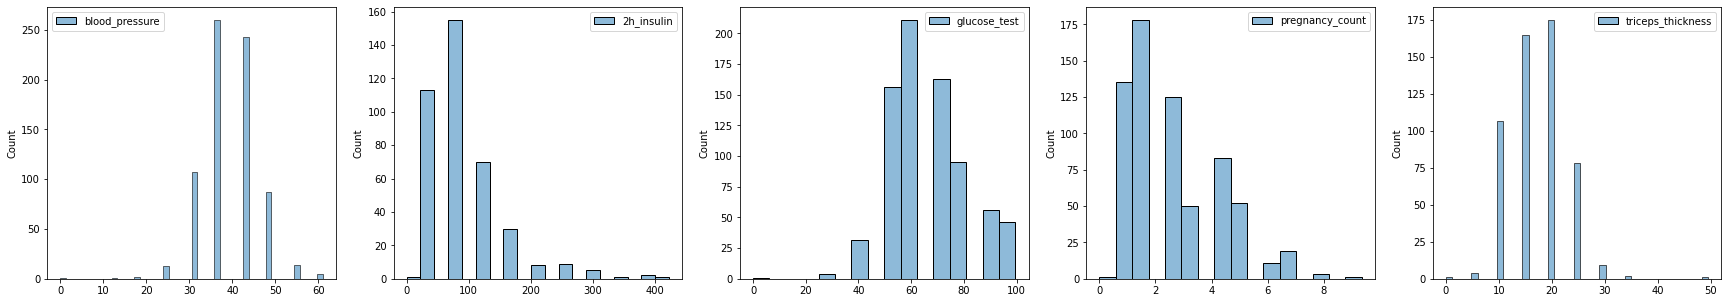

In [17]:
df_discrete_pregnancy = discretize_attribute(df[['pregnancy_count']], 10)
df_discrete_glucose_test = discretize_attribute(df[['glucose_test']], 10)
df_discrete_triceps_thickness = discretize_attribute(df[['triceps_thickness']], 10)
df_discrete_2h_insulin = discretize_attribute(df[['2h_insulin']], 10)

fig, axes = plt.subplots(1, 5, figsize=(30, 5))
sns.histplot(df_discrete_blood_pressure, ax=axes[0])
sns.histplot(df_discrete_2h_insulin, ax=axes[1])
sns.histplot(df_discrete_glucose_test, ax=axes[2])
sns.histplot(df_discrete_pregnancy, ax=axes[3])
sns.histplot(df_discrete_triceps_thickness, ax=axes[4])

plt.show()

## Q4

### (a)

In [18]:
## column names are used from ```pima-indians-diabetes.name``` file
cols = ['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin', 'mass', 'pedi', 'age', 'label']

df = pd.read_csv('hw1_data/pima/pima-indians-diabetes.data', index_col=False ,names=cols)
df.head()

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
0                6           148              72                 35   
1                1            85              66                 29   
2                8           183              64                  0   
3                1            89              66                 23   
4                0           137              40                 35   

   2h_insulin  mass   pedi  age  label  
0           0  33.6  0.627   50      1  
1           0  26.6  0.351   31      0  
2           0  23.3  0.672   32      1  
3          94  28.1  0.167   21      0  
4         168  43.1  2.288   33      1

In [19]:
df_class_0 = df[df.label == 0].copy()
df_class_1 = df[df.label == 1].copy()

In [20]:
df_class_0.describe()

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
count       500.000000      500.0000      500.000000         500.000000   
mean          3.298000      109.9800       68.184000          19.664000   
std           3.017185       26.1412       18.063075          14.889947   
min           0.000000        0.0000        0.000000           0.000000   
25%           1.000000       93.0000       62.000000           0.000000   
50%           2.000000      107.0000       70.000000          21.000000   
75%           5.000000      125.0000       78.000000          31.000000   
max          13.000000      197.0000      122.000000          60.000000   

       2h_insulin        mass        pedi         age  label  
count  500.000000  500.000000  500.000000  500.000000  500.0  
mean    68.792000   30.304200    0.429734   31.190000    0.0  
std     98.865289    7.689855    0.299085   11.667655    0.0  
min      0.000000    0.000000    0.078000   21.000000    0.0  
25%      0.000000   25.400000    0.229750   23.000000    0.0  
50%     39.000000   30.050000    0.336000   27.000000    0.0  
75%    105.000000   35.300000    0.561750   37.000000    0.0  
max    744.000000   57.300000    2.329000   81.000000    0.0

In [21]:
df_class_1.describe()

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
count       268.000000    268.000000      268.000000         268.000000   
mean          4.865672    141.257463       70.824627          22.164179   
std           3.741239     31.939622       21.491812          17.679711   
min           0.000000      0.000000        0.000000           0.000000   
25%           1.750000    119.000000       66.000000           0.000000   
50%           4.000000    140.000000       74.000000          27.000000   
75%           8.000000    167.000000       82.000000          36.000000   
max          17.000000    199.000000      114.000000          99.000000   

       2h_insulin        mass        pedi         age  label  
count  268.000000  268.000000  268.000000  268.000000  268.0  
mean   100.335821   35.142537    0.550500   37.067164    1.0  
std    138.689125    7.262967    0.372354   10.968254    0.0  
min      0.000000    0.000000    0.088000   21.000000    1.0  
25%      0.000000   30.800000    0.262500   28.000000    1.0  
50%      0.000000   34.250000    0.449000   36.000000    1.0  
75%    167.250000   38.775000    0.728000   44.000000    1.0  
max    846.000000   67.100000    2.420000   70.000000    1.0

### (b)

In [22]:
## we would choose randomly an index with the probability of 66% 
def divideset1(df, prob=0.66):
    """
    divide the dataset into train and test with a probability

    INPUTS:
    --------
    df: pandas dataframe, the dataset we want to split
    prob: the probability to divide the dataset, default is 0.66

    OUTPUTS:
    ---------
    train: pandas dataframe, the portion of the dataset for train
    test: pandas dataframe, the portion of the dataset for test
    """
    ## copy the dataframe to ensure there is no problem
    dataset = df.copy()

    trainset = pd.DataFrame(columns=dataset.columns)
    testset = pd.DataFrame(columns=dataset.columns)

    ## iterate over dataset and select each row as train or test
    for i in range(0, len(dataset)):
        ## get the row
        row = dataset.iloc[0]

        probability = np.random.random()
        ## if the probability range is between 0 and chosen prob
        if probability - prob > 0:
            trainset = trainset.append(row)
        else:
            testset = testset.append(row)

    return trainset, testset


In [23]:
train_split, test_split = divideset1(df)
train_split

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   
..              ...           ...             ...                ...   
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   
0               6.0         148.0            72.0               35.0   

    2h_insulin  mass   pedi   age  label  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  
..         ...   ...    ...   ...    ...  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  
0          0.0  33.6  0.627  50.0    1.0  

[249 rows x 9 columns]

In [24]:
## check the average training split size with the count of times
times = 20
## save all lengths
lengths = []
for i in range(times):
    training_len = len(divideset1(df)[0])
    print(f'Iteration {i} - training length: {training_len}')
    lengths.append(training_len)
print('------------------------------------------')
print(f'Average Lengths: {np.average(lengths)}')

Iteration 0 - training length: 255
Iteration 1 - training length: 256
Iteration 2 - training length: 273
Iteration 3 - training length: 250
Iteration 4 - training length: 244
Iteration 5 - training length: 237
Iteration 6 - training length: 250
Iteration 7 - training length: 247
Iteration 8 - training length: 257
Iteration 9 - training length: 259
Iteration 10 - training length: 240
Iteration 11 - training length: 238
Iteration 12 - training length: 270
Iteration 13 - training length: 267
Iteration 14 - training length: 248
Iteration 15 - training length: 248
Iteration 16 - training length: 273
Iteration 17 - training length: 257
Iteration 18 - training length: 259
Iteration 19 - training length: 247
------------------------------------------
Average Lengths: 253.75


### (c)

In [25]:
def divideset2(df, fraction = 0.66):
    """
    Divide the dataset into train and test with fixed size every run

    INPUTS:
    ---------
    df: pandas dataframe, the dataset that is going to be splitted
    fraction: the value to divide the dataset, default is 0.66

    OUTPUTS:
    ---------
    train: pandas dataframe, the portion of the dataset for train
    test: pandas dataframe, the portion of the dataset for test
    """

    train = df.sample(frac=0.66).copy()
    test = df.drop(train.index)

    return train, test

train2, test2 = divideset2(df)

print(train2.head())
print('-----------------------'* 10)
print(test2.head())


     pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
630                7           114              64                  0   
136                0           100              70                 26   
468                8           120               0                  0   
728                2           175              88                  0   
382                1           109              60                  8   

     2h_insulin  mass   pedi  age  label  
630           0  27.4  0.732   34      1  
136          50  30.8  0.597   21      0  
468           0  30.0  0.183   38      1  
728           0  22.9  0.326   22      0  
382         182  25.4  0.947   21      0  
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \


## Validation schemes
### (a) K-fold Cross Validation

In [26]:
def kfold_crossvalidation(data, k, m):
    """
    K-fold cross validation 
    Note: test data is equivalent the validation data in normal machine learning models (Because it is used to evaluate one model)

    INPUTS:
    --------
    data: pandas dataframe containing feature vectors as rows
    k: positive integer, the number of folds
    m: target output 
    train_split:  the fraction of data that is used to split for training, default is 0.7

    OUTPUTS:
    ---------
    training_data: multi-dimensional array of training data, each index contains the dataset for K-fold number
    test_data: multi-dimensional array of test data, each ```index+1``` contains the dataset for each K-fold number
    """
    ## get the length of data to split it
    dataframe_size = len(data)

    ## find the length of each split
    # training_size = int(dataframe_size * train_split)
    # test_size = dataframe_size - training_size

    ## empty arrays to save data into it
    training_data = []
    test_data = []

    ## find the split size
    split = int(dataframe_size / k)

    ## split the data into k-fold and add the folds into the arrays
    for i in range(k):
        start_idx = int(i*split)
        end_idx = int((i+1)*split)

        test = data.iloc[start_idx:end_idx].copy()
        ## add the label column to corresponding index
        test['label'] = m.iloc[start_idx: end_idx]
        
        
        ## choose other part of dataset as train
        train = pd.concat([data, test, test]).drop_duplicates(keep=False)
        train['label'] = m.iloc[train.index]
        
        training_data.append(train)
        test_data.append(test)

    return training_data, test_data


In [27]:
K = 5
training_folds, test_folds = kfold_crossvalidation(df, K, df.label )

In [28]:
## check the K=1 test data fold
test_folds[0]

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
0                  6           148              72                 35   
1                  1            85              66                 29   
2                  8           183              64                  0   
3                  1            89              66                 23   
4                  0           137              40                 35   
..               ...           ...             ...                ...   
148                5           147              78                  0   
149                2            90              70                 17   
150                1           136              74                 50   
151                4           114              65                  0   
152                9           156              86                 28   

     2h_insulin  mass   pedi  age  label  
0             0  33.6  0.627   50      1  
1             0  26.6  0.351   31      0  
2             0  23.3  0.672   32      1  
3            94  28.1  0.167   21      0  
4           168  43.1  2.288   33      1  
..          ...   ...    ...  ...    ...  
148           0  33.7  0.218   65      0  
149           0  27.3  0.085   22      0  
150         204  37.4  0.399   24      0  
151           0  21.9  0.432   37      0  
152         155  34.3  1.189   42      1  

[153 rows x 9 columns]

In [29]:
## check K=1 fold training set 
training_folds[0]

pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
153                1           153              82                 42   
154                8           188              78                  0   
155                7           152              88                 44   
156                2            99              52                 15   
157                1           109              56                 21   
..               ...           ...             ...                ...   
763               10           101              76                 48   
764                2           122              70                 27   
765                5           121              72                 23   
766                1           126              60                  0   
767                1            93              70                 31   

     2h_insulin  mass   pedi  age  label  
153         485  40.6  0.687   23      0  
154           0  47.9  0.137   43      1  
155           0  50.0  0.337   36      1  
156          94  24.6  0.637   21      0  
157         135  25.2  0.833   23      0  
..          ...   ...    ...  ...    ...  
763         180  32.9  0.171   63      0  
764           0  36.8  0.340   27      0  
765         112  26.2  0.245   30      0  
766           0  30.1  0.349   47      1  
767           0  30.4  0.315   23      0  

[615 rows x 9 columns]

In [30]:
## we can see that the test and train summation size matches the whole dataframe
for k in range(K):
    ## does it maches the whole dataset size? (condition variable)
    condition = (len(df) == (len(training_folds[k]) + len(test_folds[k]))) 
    print(f'Fold K={k+1}, the summation matches the whole set, {condition}')

Fold K=1, the summation matches the whole set, True
Fold K=2, the summation matches the whole set, True
Fold K=3, the summation matches the whole set, True
Fold K=4, the summation matches the whole set, True
Fold K=5, the summation matches the whole set, True


### (b) Bootstraping

In [31]:
def bootstrap1(data):
    """
    Demonstrate one iteration of bootstraping method (it is a with replacement method)

    INPUT:
    -------
    data: a pandas dataframe, containing our data

    OUPUTS:
    --------
    train_data: pandas dataframe of a sample data
    test_data: pandas dataframe of sample data, the data that are not included in train_data
    """
    ## find the length of our data (how many data rows we have)
    data_length = len(data)
    
    ## the indexes to be chosen from original data 
    indexes = np.random.randint(data_length, size=data_length)
    
    ## create the training set
    train_data = df.iloc[indexes].copy()

    ## choose the test set, (The data that is omited from training set)
    test_data = pd.concat([data,train_data, train_data]).drop_duplicates(keep=False)

    return train_data, test_data

In [32]:
bootstrap_train, bootstrap_test = bootstrap1(df)

In [33]:
## check the training set length with original data
len(bootstrap_train) == len(df)

True

In [34]:
print(len(bootstrap_train))
bootstrap_train.head()

768


pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
455               14           175              62                 30   
67                 2           109              92                  0   
692                2           121              70                 32   
191                9           123              70                 44   
711                5           126              78                 27   

     2h_insulin  mass   pedi  age  label  
455           0  33.6  0.212   38      1  
67            0  42.7  0.845   54      0  
692          95  39.1  0.886   23      0  
191          94  33.1  0.374   40      0  
711          22  29.6  0.439   40      0

In [35]:
print(len(bootstrap_test))
bootstrap_test.head()

277


pregnancy_count  glucose_test  blood_pressure  triceps_thickness  \
1                 1            85              66                 29   
3                 1            89              66                 23   
8                 2           197              70                 45   
12               10           139              80                  0   
16                0           118              84                 47   

    2h_insulin  mass   pedi  age  label  
1            0  26.6  0.351   31      0  
3           94  28.1  0.167   21      0  
8          543  30.5  0.158   53      1  
12           0  27.1  1.441   57      0  
16         230  45.8  0.551   31      1

## Q7
### (f)

In [36]:
def poisson_distribution(X,lambda1):
    """
    poisson distribution function

    INPUT:
    --------
    X: integer or an array of integers, the input value
    lambda1: float, hyperparameter to set 

    OUTPUT:
    ---------
    probabiltiy: type is same as input, the probability distribution of X
    """
    ## calculate the value above the division and below separately
    above_division = np.exp(- lambda1) * np.power(lambda1, X)
    under_division = scipy.special.factorial(X)

    
    return np.divide(above_division, under_division)

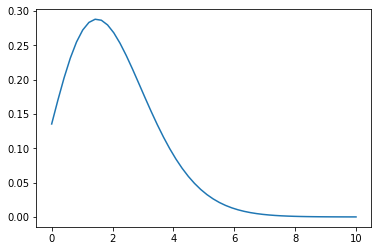

In [37]:
## parameter lambda = 2
X = np.linspace(0, 10, 50)
Y1 = poisson_distribution(X, lambda1=2)
plt.plot(X, Y1)
plt.show()

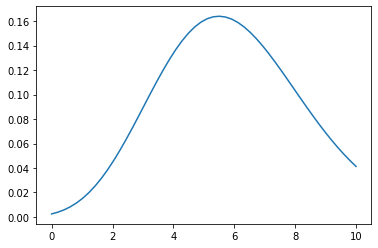

In [38]:
## parameter lambda = 6
X = np.linspace(0, 10, 50)
Y1 = poisson_distribution(X, lambda1=6)
plt.plot(X, Y1)
plt.show()

### (g)

The Maximum Likelihood estimation for poisson distribution is as below (Calculated in Q7 part c)
\begin{equation}
\lambda = \frac{1}{n} \sum_{i=0}^{n} x_i
\end{equation}

In [39]:
## Read the data from poisson.txt file
X_poisson = np.fromfile('hw1_data/poisson.txt', dtype=float, sep='\n')
## Maximum Likelihood estimation
lambda1 = np.sum(X_poisson) / len(X_poisson)

In [40]:
print('Maximum Likelihood Estimated Parameter for poisson.txt: ', lambda1)

Maximum Likelihood Estimated Parameter for poisson.txt:  5.24


### (h)

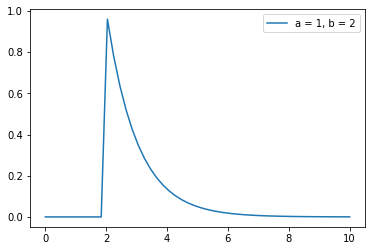

In [41]:
X = np.linspace(0, 10, 50)
gamma_model = scipy.stats.gamma(1,2)
plt.plot(X, gamma_model.pdf(X))
plt.legend(['a = 1, b = 2'])
plt.show()

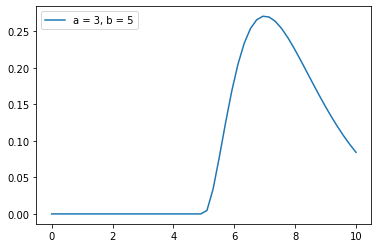

In [42]:
X = np.linspace(0, 10, 50)
gamma_model = scipy.stats.gamma(3,5)
plt.plot(X, gamma_model.pdf(X))
plt.legend(['a = 3, b = 5'])
plt.show()

### (i)
Posterior density can be found as
\begin{equation}
Posterior = Likelihood \times Prior 
\end{equation}
The prior of probability is
\begin{equation}
P(x) = \frac{e^{-\lambda} \lambda^x}{x!}
\end{equation}
\begin{equation}
p(\lambda | a,b) = \frac{1}{b^a \Gamma(a)} \lambda^{a-1} e^{-\frac{\lambda}{b}}
\end{equation}
And assuming the poisson.txt file we found the proper value for lambda

In [43]:
def posterior_poisson(X, a,b, lambda1):
    """
    posterior for poisson distribution

    INPUTS:
    -------
    X: values to calculate the posterior
    a,b: parameters for gamma distribution

    OUTPUT:
    --------
    probability: floating number or an array
    """
    ## we divided the function in 3 parts then multiplied it
    gamma_distro = scipy.stats.gamma(a)
    values = gamma_distro.pdf(X)
    p1 = (b ** a) * values
    p1 = 1 / p1

    p2 = lambda1 ** (a-1)
    
    p3 = np.exp(-lambda1 / b)

    probability = p1 * p2 * p3
    print(len(probability))
    return probability


25


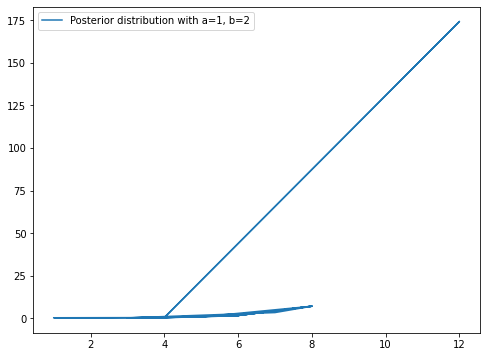

In [44]:
Y = posterior_poisson(X_poisson, 3, 5, lambda1)
plt.figure(figsize=(8,6))
plt.plot(X_poisson,Y)
plt.legend(['Posterior distribution with a=1, b=2'])
plt.show()

It can be seen from the plot that the posterior is not a function and it have multiple values of x for each y in range of 4 to 8. 

## Q8

### Part 1

#### (a)

In [45]:
## read the data from housing.txt
## there is one or more space for each data
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = pd.read_csv('hw1_data/housing/housing.txt', sep= ' +', index_col=False, names=columns)

/home/amin/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [46]:
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [47]:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

As we can see there is no attribute type as object, so we will look at the dataset closely. <br>

In [48]:
df_boston.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

It is clear here that CHAS is a binary feature.

In [49]:
df_boston.ZN.value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

So after having a look at dataset and two of the features we saw that just one of the columns have binary value, and it is the CHAS.

#### (b)

In [50]:
correlation = df_boston[columns[:-1]].corrwith(df_boston.MEDV).sort_values(ascending=True)
pd.DataFrame(correlation, columns=['correlation with MEDV'])

correlation with MEDV
LSTAT                -0.737663
PTRATIO              -0.507787
INDUS                -0.483725
TAX                  -0.468536
NOX                  -0.427321
CRIM                 -0.388305
RAD                  -0.381626
AGE                  -0.376955
CHAS                  0.175260
DIS                   0.249929
B                     0.333461
ZN                    0.360445
RM                    0.695360

It is clear from above that: <br>
Highest Positive Correlation: RM <br>
Highest Negative Correlation: LSTAT

#### (c)

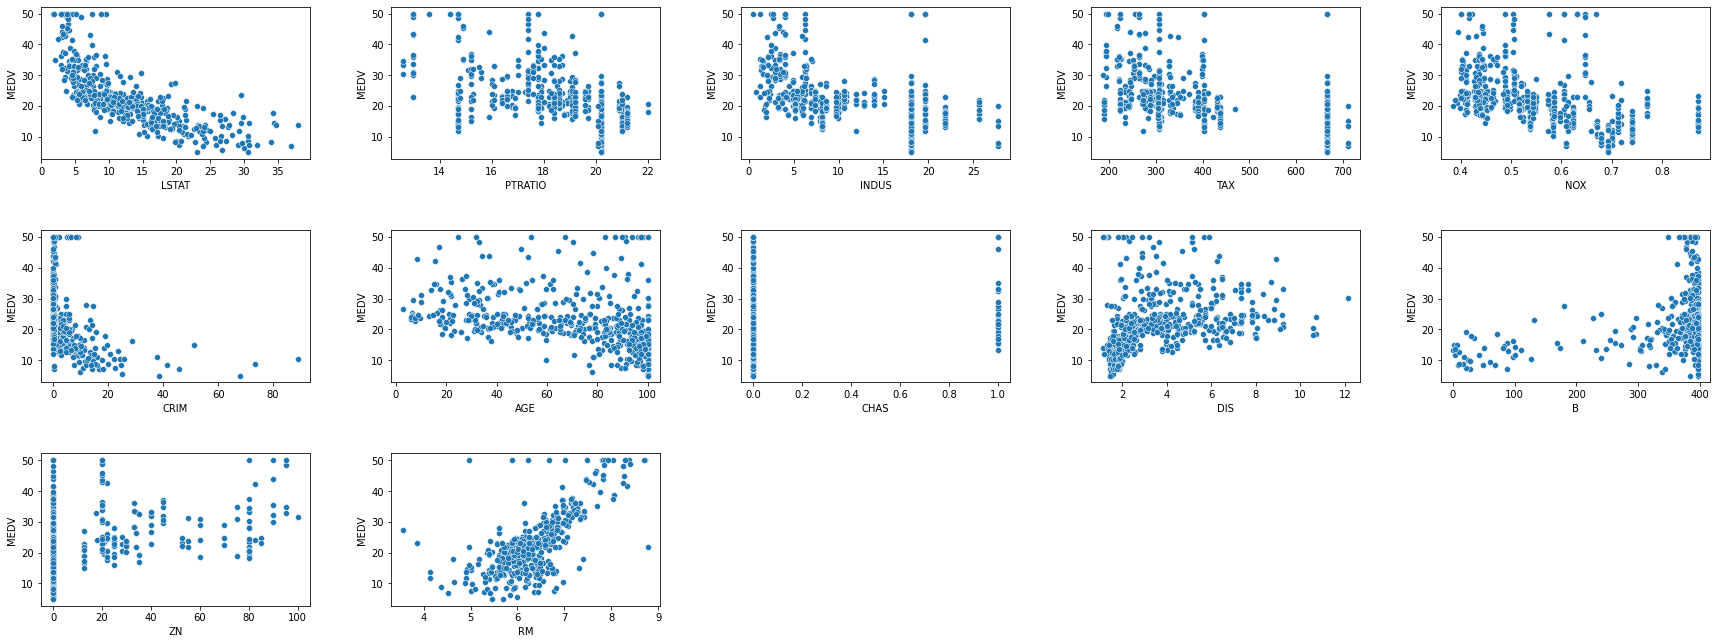

In [51]:
fig, axes = plt.subplots(3, 5, figsize=(25, 10))
fig.tight_layout(pad=5)

sns.scatterplot(x=df_boston.LSTAT, y=df_boston.MEDV, ax=axes[0,0])
sns.scatterplot(x=df_boston.PTRATIO, y=df_boston.MEDV, ax=axes[0,1])
sns.scatterplot(x=df_boston.INDUS, y=df_boston.MEDV, ax=axes[0,2])
sns.scatterplot(x=df_boston.TAX, y=df_boston.MEDV, ax=axes[0,3])
sns.scatterplot(x=df_boston.NOX, y=df_boston.MEDV, ax=axes[0,4])
sns.scatterplot(x=df_boston.CRIM, y=df_boston.MEDV, ax=axes[1,0])
sns.scatterplot(x=df_boston.AGE, y=df_boston.MEDV, ax=axes[1,1])
sns.scatterplot(x=df_boston.CHAS, y=df_boston.MEDV, ax=axes[1,2])
sns.scatterplot(x=df_boston.DIS, y=df_boston.MEDV, ax=axes[1,3])
sns.scatterplot(x=df_boston.B, y=df_boston.MEDV, ax=axes[1,4])
sns.scatterplot(x=df_boston.ZN, y=df_boston.MEDV, ax=axes[2,0])
sns.scatterplot(x=df_boston.RM, y=df_boston.MEDV, ax=axes[2,1])
axes[2,2].set_axis_off()
axes[2,3].set_axis_off()
axes[2,4].set_axis_off()



The most correlated features are having the most linear scatter plot. As we can see from the scatter plots, RM and LSTAT are in the most linear form.

#### (d)

In [52]:
df_boston.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

The most correlated ones are **TAX** and **RAD** with the correlation value of 0.910228.

### Part 2

In [53]:
def df_housing_read(test = False):
    columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    if test:
        df = pd.read_csv('hw1_data/housing/housing_test.txt', sep=' +', names=columns, index_col=False, engine='python')
    else:
        df = pd.read_csv('hw1_data/housing/housing_train.txt', sep=' +', names=columns, index_col=False, engine='python')
    return df

#### (a)

In [54]:
df_train = df_housing_read()
df_train.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Target output is *MEDV*, and we can split it from the train dataset.

In [55]:
## Get feature vectors and target output
Y = df_train.MEDV.copy()
X = df_train.drop(['MEDV'], axis=1)

Linear regression weights can be found as
\begin{equation}
w = A^{-1} b
\end{equation}
where b and A can be found as
\begin{equation}
A = \sum_{i=0}^{n} x_i x_i^{T}
\end{equation}
\begin{equation}
b = \sum_{i=0}^{n} y_i x_i
\end{equation}

In [56]:
def LR_solve(X, Y):
    """
    Linear regression solve function
    Using the old equation w = invers(A) * b

    Parameters:
    --------
    X : matrix_like
        The feature vectors matrix
    Y : array_like
        The vector of each feature vector labels (target outputs)

    Returns:
    --------
    w : array_like
        The vector of weights fitted on `X` features
    """
    A = X.dot(X.T)
    ## create b and preprocess it
    b = Y.multiply(X)
    b = np.sum(b, axis=1)
    
    w = np.linalg.inv(A).dot(b)

    return w

In [57]:
## giving the transpose of X, because it's as row in our dataset
w = LR_solve(X.T, Y)
print(f'Weights: {w}', f'\nShape:{w.shape}')

Weights: [-9.79342380e-02  4.89586765e-02 -2.53928478e-02  3.45087927e+00
 -3.55458931e-01  5.81653272e+00 -3.31447963e-03 -1.02050134e+00
  2.26563208e-01 -1.22458785e-02 -3.88029879e-01  1.70214971e-02
 -4.85012955e-01] 
Shape:(13,)


#### (b)

In [58]:
def LR_predict(X_test, w):
    """
    Predict the Linear Regression using fixed input weights

    Paramaters:
    -----------
    X_test : matrix_like 
        test data, an array of feature vectors
    w : array_like
        array of weights, shape must meet `(n, 1)`, column vector

    Returns:
    --------
    Y_pred : array_like 
        the prediction of test data, using weights
    """
    Y_pred = X_test @ w

    return Y_pred

In [59]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_test = pd.read_csv('hw1_data/housing/housing_test.txt', sep=' +', names=columns, index_col=False, engine='python')
df_test.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.84054  0.0   8.14     0  0.538  5.599  85.7  4.4546    4  307.0     21.0   
1  0.67191  0.0   8.14     0  0.538  5.813  90.3  4.6820    4  307.0     21.0   
2  0.95577  0.0   8.14     0  0.538  6.047  88.8  4.4534    4  307.0     21.0   
3  0.77299  0.0   8.14     0  0.538  6.495  94.4  4.4547    4  307.0     21.0   
4  1.00245  0.0   8.14     0  0.538  6.674  87.3  4.2390    4  307.0     21.0   

        B  LSTAT  MEDV  
0  303.42  16.51  13.9  
1  376.88  14.81  16.6  
2  306.38  17.28  14.8  
3  387.94  12.80  18.4  
4  380.23  11.98  21.0

In [60]:
X_test = df_test.drop(columns=['MEDV'])
Y_test_actual = df_test.MEDV

In [61]:
Y_test_pred = LR_predict(X_test, w)
Y_test_pred[:5]

0    13.411778
1    16.500643
2    15.674173
3    21.839123
4    23.367941
dtype: float64

#### (c, d)

In [62]:
## the main3_2.py program
!python3 scripts/main3_2.py

Linear Regression on housing dataset program!
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577  0.0   8.14     0  0.538  ...    4  307.0     21.0  306.38  17.28
3  0

### Part 3

#### (a) Online Linear Regression 
The equation for online linear regression is
\begin{equation}
W_i = W_{i-1} + \alpha_i (y_i - f(x_i, W_{i-1})) x_i
\end{equation}
Where $\alpha$ is the learning rate, $W_i$ is the weights rate fot the $i$-th iteration and $x_i$ is the $i$-th feature vector. 

In [63]:
df_train = df_housing_read()

In [64]:
def normalize(df):
    """
    normalize a pandas dataframe

    Parameters:
    ------------
    df : pandas dataframe
        the dataset that is going to be normalized
    
    Returns:
    ----------
    df : pandas dataframe
        the normalized dataframe
    """
    df_normalized = df.copy()
    cols = df_normalized.columns
    for col in cols:
        df_normalized[col] = (df_normalized[col] - df_normalized[col].mean() ) / df_normalized[col].std()

    return df_normalized

In [65]:
df_train_normal = normalize(df_train)
df_train_normal.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.406074  0.271666 -1.269381 -0.267612 -0.128607  0.384651 -0.095048   
1 -0.403616 -0.486839 -0.554501 -0.267612 -0.726487  0.168444  0.397814   
2 -0.403618 -0.486839 -0.554501 -0.267612 -0.726487  1.241055 -0.242547   
3 -0.403023 -0.486839 -1.288905 -0.267612 -0.821802  0.978518 -0.792968   
4 -0.398727 -0.486839 -1.288905 -0.267612 -0.821802  1.187706 -0.490776   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140689 -0.969579 -0.612355 -1.449420  0.409077 -1.046568  0.119273  
1  0.567315 -0.854463 -0.934791 -0.274757  0.409077 -0.459782 -0.133425  
2  0.567315 -0.854463 -0.934791 -0.274757  0.360950 -1.180570  1.245885  
3  1.099976 -0.739347 -1.054212  0.148121  0.382235 -1.334319  1.109007  
4  1.099976 -0.739347 -1.054212  0.148121  0.409077 -0.997199  1.403821

In [66]:
def LR_Incremental_solve(X, Y, W, iter = 1000):
    """
    Incremental Learning for Linear Regression
    The method used is online gradient descent
    the learning rate is 2/t, and t stands for iteration number

    Parameters:
    ------------
    X : matrix_like
        the features vectors for training 
    Y : array_like
        the target output for each feature vectors represented in `X`
    W : array_like
        the initial weights for online gradient descent
    iter : integer
        the number of iterations to learn

    Returns:
    ---------
    W : array_like
        the learned weights for linear regression 
    """

    for i in range(iter):
        ## data index is different from the index
        ## so we calculate it everytime
        data_index = i % len(Y)

        ## the update term that is added to old weight
        update_term = Y[data_index] - Function(X.iloc[data_index], W)

        ## the learning rate
        learning_rate = (2/(i+1)) 
        update_term = np.multiply(learning_rate * update_term, X.iloc[data_index])

        ## update the weights
        W = np.add(W, update_term)
        
    return W

def Function(X, W):
    """
    The function for calculating the predicted output for `X`

    Parameters:
    -----------
    X : array_like
        the features vector  
    W : array_like
        the learned weights

    Returns:
    --------
    Y_pred : float
        The predicted value for the input weights and the feature vector
    """
    Y_pred = np.dot(W.T, X)
    
    return Y_pred

In [67]:
## initialize the data
X_train = df_train_normal.drop(columns=['MEDV'])
Y_train = df_train_normal.MEDV

W = np.zeros(13)

In [68]:
weights = LR_Incremental_solve(X = X_train,Y= Y_train,W= W)
weights

CRIM      -0.020193
ZN         0.620314
INDUS      0.289735
CHAS      -0.076357
NOX        3.653932
RM         0.948070
AGE       -1.926829
DIS        1.026664
RAD       -2.659829
TAX        0.703401
PTRATIO    1.108539
B          1.023090
LSTAT     -0.511682
dtype: float64

#### (b)

In [69]:
!python3 scripts/main3_3.py

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

#### (c)
Using unnormalized dataset, will overflow and the program would stop.

In [70]:
## we're using unnormalized dataset
X = df_train.drop(columns=['MEDV'])
Y = df_train.MEDV

W = np.zeros(13)

weights = LR_Incremental_solve(X = X,Y= Y,W= W)
weights

CRIM      NaN
ZN        NaN
INDUS     NaN
CHAS      NaN
NOX       NaN
RM        NaN
AGE       NaN
DIS       NaN
RAD       NaN
TAX       NaN
PTRATIO   NaN
B         NaN
LSTAT     NaN
dtype: float64

Getting NaN shows that overflow has happened.

#### (d)

In [71]:
!python3 scripts/main3_3.py

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

#### (d.2)

In [72]:
## using the learning rate 2 / sqrt(t)
!python3 scripts/main3_3.py learning_rate=1

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

In [73]:
## using static learning rate 0.5 
!python3 scripts/main3_3.py learning_rate=0.5

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

In [74]:
## using static learning rate 0.5 
!python3 scripts/main3_3.py learning_rate=0.01

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

As we saw, the losses for both training set and test set online Linear Regression (LR) with learning rate 0.5 is zero. We can conclude from this, that the online LR with learning rate 0.5 can be the most suitable model for our problem.

### Part 4

#### (a)

In [75]:
def extendx(X):
    """
    extend the X dataset and return the linear and two degrees dataset

    Parameters:
    -----------
    X : matrix_like
        our dataset

    Returns:
    --------
    extended_X : matrix_like
        the dataset containing both X and X^2 data
        Note: extended_X length is double the X 
    """
    df = X.copy()
    ## the power 2
    df_2 = df.multiply(df)

    df = pd.concat([ df ,df_2], ignore_index= True)


    return df

In [76]:
df = df_housing_read()

extendx(df)

CRIM    ZN     INDUS  CHAS       NOX         RM      AGE       DIS  \
0    0.006320  18.0    2.3100     0  0.538000   6.575000    65.20  4.090000   
1    0.027310   0.0    7.0700     0  0.469000   6.421000    78.90  4.967100   
2    0.027290   0.0    7.0700     0  0.469000   7.185000    61.10  4.967100   
3    0.032370   0.0    2.1800     0  0.458000   6.998000    45.80  6.062200   
4    0.069050   0.0    2.1800     0  0.458000   7.147000    54.20  6.062200   
..        ...   ...       ...   ...       ...        ...      ...       ...   
861  0.003923   0.0  142.3249     0  0.328329  43.467649  4774.81  6.143458   
862  0.002049   0.0  142.3249     0  0.328329  37.454400  5882.89  5.232656   
863  0.003692   0.0  142.3249     0  0.328329  48.664576  8281.00  4.698056   
864  0.012010   0.0  142.3249     0  0.328329  46.158436  7974.49  5.706843   
865  0.002248   0.0  142.3249     0  0.328329  36.360900  6528.64  6.275025   

     RAD      TAX  PTRATIO            B    LSTAT    MEDV  
0      1    296.0     15.3     396.9000   4.9800   24.00  
1      2    242.0     17.8     396.9000   9.1400   21.60  
2      2    242.0     17.8     392.8300   4.0300   34.70  
3      3    222.0     18.7     394.6300   2.9400   33.40  
4      3    222.0     18.7     396.9000   5.3300   36.20  
..   ...      ...      ...          ...      ...     ...  
861    1  74529.0    441.0  153656.1601  93.5089  501.76  
862    1  74529.0    441.0  157529.6100  82.4464  424.36  
863    1  74529.0    441.0  157529.6100  31.8096  571.21  
864    1  74529.0    441.0  154802.9025  41.9904  484.00  
865    1  74529.0    441.0  157529.6100  62.0944  141.61  

[866 rows x 14 columns]

#### (b)
For binary attributes, the transformation would act as $and$ logical operator. Binary attributes in the part of dataset with Linear form won't change, but in the polynomial the binaries will be logically $and$. 

#### (c)

In [77]:
!python3 scripts/main3_4.py

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

In [78]:
!python3 scripts/main3_4.py learning_rate=1

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

In [79]:
!python3 scripts/main3_4.py learning_rate=0.5

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

In [80]:
!python3 scripts/main3_4.py learning_rate=0.01

Linear Regression on housing dataset program!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Test set head :
      CRIM   ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.84054  0.0   8.14     0  0.538  ...    4  307.0     21.0  303.42  16.51
1  0.67191  0.0   8.14     0  0.538  ...    4  307.0     21.0  376.88  14.81
2  0.95577

#### (d)
Comparing the plotted losses shows that there is no big differences between both parts c and d, but there are some minor differences comparing between them. For example using the $\frac{2}{t}$ learning rate shows that the extended version of the dataset achieves the best results later than the linear version. But in contrast we can say that the we can achieve better results with linear version in more early steps.   